In [5]:
from PIL import Image
import numpy as np
import cv2
from tqdm.notebook import tqdm

from collections import Counter
import matplotlib.pyplot as plt

import os

In [30]:
# Training

path = '/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/images/training/' # cultural/auditorium/'
training_set = [path + i for i in os.listdir(path)]

In [2]:
# Validation

path = '/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/images/validation/' # cultural/auditorium/'
validation_set = [path + i for i in os.listdir(path)]

In [3]:
len(validation_set), 

(2000,)

In [31]:
training_set[0]

'/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/images/training/ADE_train_00000825.jpg'

In [65]:
class_appearnace = Counter()
for name in training_set:
    seg_png = np.array(Image.open(name.replace('images', 'annotations').replace('.jpg', '.png')))
    tmp = cv2.resize(seg_png, (672, 448), interpolation=cv2.INTER_NEAREST_EXACT)
    class_appearnace.update(np.unique(tmp))

In [32]:
# Training

class_appearnace = Counter()
category_to_imgname = {i:[] for i in range(1, 151)}
imgname_to_id = {}
for name in tqdm(training_set[-2500:]):
    seg_png = np.array(Image.open(name.replace('2016/images', '2016/annotations').replace('.jpg', '.png')))
    # print(seg_png.shape)
    tmp = cv2.resize(seg_png, (42, 28), interpolation=cv2.INTER_NEAREST_EXACT)
    uniques = np.unique(tmp)
    imgname_to_id[name] = uniques
    for cls in uniques:
        if cls in list(range(1, 151)):
            category_to_imgname[cls].append(name.replace('2016/images', '2016/annotations').replace('.jpg', '.png'))
    class_appearnace.update(uniques)

  0%|          | 0/2500 [00:00<?, ?it/s]

In [4]:
# Validation

class_appearnace_val = Counter()
category_to_imgname_val = {i:[] for i in range(1, 151)}
for name in tqdm(validation_set):
    seg_png = np.array(Image.open(name.replace('2016/images', '2016/annotations').replace('.jpg', '.png')))
    # print(seg_png.shape)
    tmp = cv2.resize(seg_png, (42, 28), interpolation=cv2.INTER_NEAREST_EXACT)
    uniques = np.unique(tmp)
    for cls in uniques:
        if cls in list(range(1, 151)):
            category_to_imgname_val[cls].append(name.replace('2016/images', '2016/annotations').replace('.jpg', '.png'))
    class_appearnace_val.update(uniques)

100%|███████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:42<00:00, 47.60it/s]


In [6]:
sorted(class_appearnace_val.items(),key = lambda i: i[0])

[(0, 1922),
 (1, 1165),
 (2, 610),
 (3, 797),
 (4, 921),
 (5, 640),
 (6, 640),
 (7, 399),
 (8, 188),
 (9, 453),
 (10, 221),
 (11, 290),
 (12, 309),
 (13, 505),
 (14, 187),
 (15, 313),
 (16, 403),
 (17, 158),
 (18, 423),
 (19, 218),
 (20, 312),
 (21, 297),
 (22, 73),
 (23, 315),
 (24, 106),
 (25, 127),
 (26, 69),
 (27, 57),
 (28, 123),
 (29, 121),
 (30, 44),
 (31, 98),
 (32, 55),
 (33, 135),
 (34, 61),
 (35, 73),
 (36, 43),
 (37, 294),
 (38, 37),
 (39, 96),
 (40, 153),
 (41, 37),
 (42, 158),
 (43, 77),
 (44, 267),
 (45, 46),
 (46, 36),
 (47, 30),
 (48, 117),
 (49, 23),
 (50, 38),
 (51, 43),
 (52, 12),
 (53, 62),
 (54, 97),
 (55, 14),
 (56, 11),
 (57, 18),
 (58, 109),
 (59, 18),
 (60, 48),
 (61, 26),
 (62, 28),
 (63, 22),
 (64, 60),
 (65, 75),
 (66, 49),
 (67, 131),
 (68, 105),
 (69, 27),
 (70, 61),
 (71, 31),
 (72, 52),
 (73, 35),
 (74, 9),
 (75, 28),
 (76, 33),
 (77, 23),
 (78, 20),
 (79, 6),
 (80, 8),
 (81, 22),
 (82, 49),
 (83, 231),
 (84, 37),
 (85, 14),
 (86, 56),
 (87, 55),
 (88, 

In [33]:
sorted(class_appearnace.items(),key = lambda i: i[0])

[(0, 2387),
 (1, 1444),
 (2, 734),
 (3, 973),
 (4, 1179),
 (5, 772),
 (6, 806),
 (7, 474),
 (8, 233),
 (9, 570),
 (10, 288),
 (11, 355),
 (12, 387),
 (13, 607),
 (14, 206),
 (15, 454),
 (16, 551),
 (17, 194),
 (18, 485),
 (19, 273),
 (20, 409),
 (21, 381),
 (22, 70),
 (23, 435),
 (24, 140),
 (25, 168),
 (26, 86),
 (27, 78),
 (28, 160),
 (29, 141),
 (30, 46),
 (31, 150),
 (32, 75),
 (33, 155),
 (34, 91),
 (35, 85),
 (36, 51),
 (37, 372),
 (38, 50),
 (39, 119),
 (40, 173),
 (41, 50),
 (42, 196),
 (43, 93),
 (44, 281),
 (45, 81),
 (46, 59),
 (47, 50),
 (48, 146),
 (49, 34),
 (50, 52),
 (51, 41),
 (52, 13),
 (53, 58),
 (54, 102),
 (55, 13),
 (56, 20),
 (57, 27),
 (58, 115),
 (59, 14),
 (60, 69),
 (61, 35),
 (62, 28),
 (63, 33),
 (64, 45),
 (65, 89),
 (66, 60),
 (67, 142),
 (68, 128),
 (69, 29),
 (70, 84),
 (71, 47),
 (72, 59),
 (73, 46),
 (74, 19),
 (75, 32),
 (76, 40),
 (77, 32),
 (78, 19),
 (79, 8),
 (80, 9),
 (81, 24),
 (82, 66),
 (83, 254),
 (84, 49),
 (85, 15),
 (86, 75),
 (87, 75),
 

In [306]:
training_set[0]

'/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/images/training/ADE_train_00000825.jpg'

In [34]:
selected_imgs = {i: [] for i in range(150, 0, -1)}
selected_flatten = set([])

available_tiles = set([name.replace('2016/images', '2016/annotations').replace('.jpg', '.png') for name in training_set])
# available_tiles = set([name.replace('2016/images', '2016/annotations').replace('.jpg', '.png') for name in validation_set])

In [36]:
category_to_imgname

{1: ['/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations/training/ADE_train_00000744.png',
  '/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations/training/ADE_train_00001833.png',
  '/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations/training/ADE_train_00000150.png',
  '/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations/training/ADE_train_00006460.png',
  '/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations/training/ADE_train_00003496.png',
  '/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations/training/ADE_train_00005781.png',
  '/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations/training/ADE_train_00010286.png',
  '/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations

In [37]:
# Training

for cat in range(150, 0, -1):
    remaining = (set(category_to_imgname[cat]) - selected_flatten)
    # print(remaining)
    remaining = remaining.intersection(available_tiles)
    remaining = list(remaining)
    # print(remaining)
    select = remaining[:4]
    selected_imgs[cat] = select
    selected_flatten.update(set(select))
    print(f"For Category #{cat}, {len(remaining)} out of {len(set(category_to_imgname[cat]))} tiles were available. Selected {len(select)} of them.")

For Category #150, 49 out of 49 tiles were available. Selected 4 of them.
For Category #149, 74 out of 75 tiles were available. Selected 4 of them.
For Category #148, 62 out of 62 tiles were available. Selected 4 of them.
For Category #147, 19 out of 20 tiles were available. Selected 4 of them.
For Category #146, 13 out of 13 tiles were available. Selected 4 of them.
For Category #145, 32 out of 32 tiles were available. Selected 4 of them.
For Category #144, 21 out of 21 tiles were available. Selected 4 of them.
For Category #143, 58 out of 60 tiles were available. Selected 4 of them.
For Category #142, 29 out of 29 tiles were available. Selected 4 of them.
For Category #141, 11 out of 11 tiles were available. Selected 4 of them.
For Category #140, 40 out of 41 tiles were available. Selected 4 of them.
For Category #139, 68 out of 70 tiles were available. Selected 4 of them.
For Category #138, 48 out of 50 tiles were available. Selected 4 of them.
For Category #137, 59 out of 60 tiles 

In [12]:
# Validation

for cat in range(150, 0, -1):
    remaining = (set(category_to_imgname_val[cat]) - selected_flatten)
    # print(remaining)
    remaining = remaining.intersection(available_tiles)
    remaining = list(remaining)
    # print(remaining)
    select = remaining[:2]
    selected_imgs[cat] = select
    selected_flatten.update(set(select))
    print(f"For Category #{cat}, {len(remaining)} out of {len(set(category_to_imgname_val[cat]))} tiles were available. Selected {len(select)} of them.")

For Category #150, 45 out of 45 tiles were available. Selected 2 of them.
For Category #149, 77 out of 77 tiles were available. Selected 2 of them.
For Category #148, 55 out of 55 tiles were available. Selected 2 of them.
For Category #147, 27 out of 27 tiles were available. Selected 2 of them.
For Category #146, 11 out of 11 tiles were available. Selected 2 of them.
For Category #145, 19 out of 19 tiles were available. Selected 2 of them.
For Category #144, 22 out of 22 tiles were available. Selected 2 of them.
For Category #143, 47 out of 47 tiles were available. Selected 2 of them.
For Category #142, 17 out of 18 tiles were available. Selected 2 of them.
For Category #141, 5 out of 6 tiles were available. Selected 2 of them.
For Category #140, 44 out of 44 tiles were available. Selected 2 of them.
For Category #139, 85 out of 85 tiles were available. Selected 2 of them.
For Category #138, 46 out of 50 tiles were available. Selected 2 of them.
For Category #137, 52 out of 53 tiles we

In [13]:
selected_imgs

{150: ['/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations/validation/ADE_val_00000788.png',
  '/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations/validation/ADE_val_00001597.png'],
 149: ['/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations/validation/ADE_val_00000940.png',
  '/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations/validation/ADE_val_00001846.png'],
 148: ['/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations/validation/ADE_val_00000272.png',
  '/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations/validation/ADE_val_00001120.png'],
 147: ['/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallengeData2016/annotations/validation/ADE_val_00001102.png',
  '/mnt/lwll/lwll-coral/hrant/ade20k/ADE20K_2021_17_01/images/ADEChallenge

In [39]:
for i in range(1, 151):
    if len(selected_imgs[i]) != 4:
        print(selected_imgs[i])
        print()

tiling imgs

In [40]:
required_filenames = []

for x in selected_imgs.values():
    required_filenames += x

In [41]:
len(required_filenames)

600

In [42]:
cats = [{
    'supercategory': f'{i}',
    'id': i,
    'name': f'{i}'
        } for i in range(1, 151)]

In [43]:
dataset = {
    'images': [],
    'categories': cats
}

for name in tqdm(required_filenames):
    filename = name.replace('annotations', 'images').replace('.png', '.jpg')
    _id = int(filename.strip().split('_')[-1].replace('.jpg', ''))
    # print(name, id)
    black_image = np.array(Image.open(name))
    height, width = black_image.shape
    black_image = cv2.resize(black_image, (672, 448), interpolation=cv2.INTER_NEAREST_EXACT)
    # print(black_image.shape)
    patch_labels = cv2.resize(black_image, (14, 14), interpolation=cv2.INTER_NEAREST_EXACT).flatten()
    # height, width = black_image.shape
    tmp_dct = {
        'file_name': filename,
        'height': height,
        'width': width,
        'id': _id,
        'black_image': black_image,
        'patch_labels': patch_labels
    }
    dataset['images'].append(tmp_dct)

  0%|          | 0/600 [00:00<?, ?it/s]

In [44]:
tmp_dct['height']

512

In [28]:
black_image.shape

(448, 672)

In [45]:
saving_path = '/home/hkhachatrian/mae/annotations/ade20k/'
np.save(saving_path + 'ade20k_train_4.npy', dataset)

# saving_path = '/home/hkhachatrian/mae/annotations/ade20k/'
# np.save(saving_path + 'ade20k_val_2.npy', dataset)

In [21]:
# target_path = '/mnt/lwll/lwll-coral/hrant/vision/images/ade20k/ade_224_4/train/'
target_path = '/mnt/lwll/lwll-coral/hrant/vision/images/ade20k/ade_224_4/val/'

In [22]:
target_size = 224

In [23]:
tiled_dataset = {
    'images': [],
    'categories': dataset['categories']
}


for image in tqdm(dataset['images']):
    height, width = image['height'], image['width']
    # height, width = 448, 672
    file_name_split = image['file_name'].split('/')[-1].split('.')
    # print(file_name_split)
    name = '.'.join(file_name_split[:-1])
    extension = file_name_split[-1]
    
    y_count = int(np.ceil(height / target_size))
    x_count = int(np.ceil(width / target_size))

    # print(image['file_name'])
    img = cv2.imread(image['file_name'])
    img = cv2.resize(img, (width, height))
    img_pad = np.zeros((y_count * target_size, x_count * target_size, img.shape[2]), np.uint8)
    img_pad[:height, :width] = img
    
    mask_pad = np.zeros((y_count * target_size, x_count * target_size), np.uint8)
    mask_pad[:height, :width] = image['black_image']
    
    for y in range(y_count):
        for x in range(x_count):
            tile = img_pad[y * target_size : (y+1) * target_size, x * target_size : (x+1) * target_size]
            tile_name = os.path.join(target_path, f"{name}.{target_size}_{y}_{x}.{extension}")
            
            cv2.imwrite(tile_name, tile)
            
            tile_black_image = mask_pad[y * target_size : (y+1) * target_size, x * target_size : (x+1) * target_size]
            
            tile_patch_labels = cv2.resize(tile_black_image, (14,14), interpolation=cv2.INTER_NEAREST_EXACT).flatten() #.float()
            tile_patch_labels_16x_16 = cv2.resize(tile_black_image, (16,16), interpolation=cv2.INTER_NEAREST_EXACT).flatten() #.float()
            
            tiled_dataset['images'].append({
                'file_name': tile_name,
                'height': target_size,
                'width': target_size,
                'id': image['id'], # if we need annotations, this has to be fixed
                'black_image': tile_black_image,
                'patch_labels': tile_patch_labels,
                'patch_labels_16x16': tile_patch_labels_16x_16
            })

  0%|          | 0/300 [00:00<?, ?it/s]

In [24]:
len(tiled_dataset['images'])

1800

In [25]:
# np.save(saving_path + "ade20k_224_train_4.npy", tiled_dataset)
np.save(saving_path + "ade20k_224_val_2.npy", tiled_dataset)

In [50]:
h = [int(i) for i in list(heights.keys())]
h_counts = [int(i) for i in list(heights.values())]
w = [int(i) for i in list(widths.keys())]
w_counts = [int(i) for i in list(widths.values())]

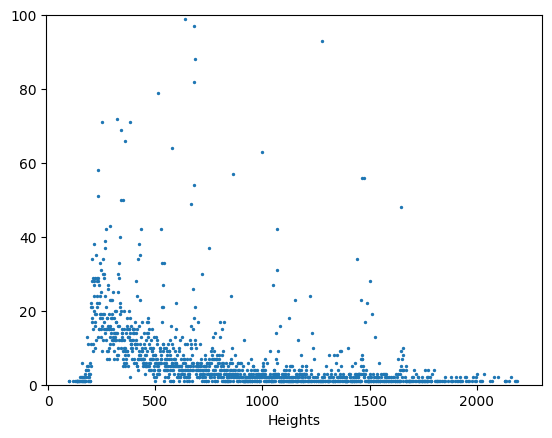

In [71]:
plt.scatter(h, h_counts, s=2);
plt.ylim(bottom=0, top=100);
plt.xlim()
plt.xlabel('Heights');

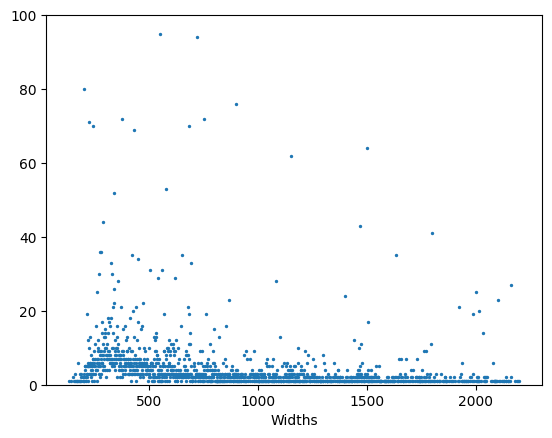

In [70]:
plt.scatter(w, w_counts, s=2)
plt.ylim(bottom=0, top=100);
plt.xlabel('Widths');

In [26]:
heights

Counter({'3': 23,
         '0': 24,
         '1': 13,
         '6': 20,
         '2': 10,
         '4': 8,
         '8': 9,
         '9': 4,
         '7': 10,
         '5': 12})

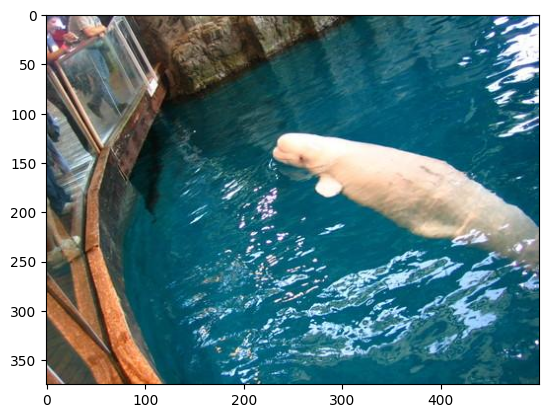

In [7]:
plt.imshow(np.array(Image.open(path+'ADE_train_00001493.jpg')))

In [9]:
x = np.array(Image.open(path+'ADE_train_00001493.jpg'))

In [11]:
x.shape

(375, 500, 3)